# 🧠 1️⃣ The Problem - We Want to Make Decisions

Imagine you are a **teacher 👩‍🏫**.  
You have data about students:

| **Hours Studied** | **Passed (Yes = 1 / No = 0)** |
|-------------------:|:-----------------------------:|
| 1 | 0 |
| 2 | 0 |
| 3 | 0 |
| 4 | 1 |
| 5 | 1 |

---

Now you want to build a simple system that can **predict**:

> 💬 “If a student studies this many hours, what is the **chance** they will pass?”

This is a **decision-making problem** - we want to use data to decide **Yes (1)** or **No (0)** for future students.  
That’s exactly where **Logistic Regression** comes in!


## Step 1 - Draw the Data

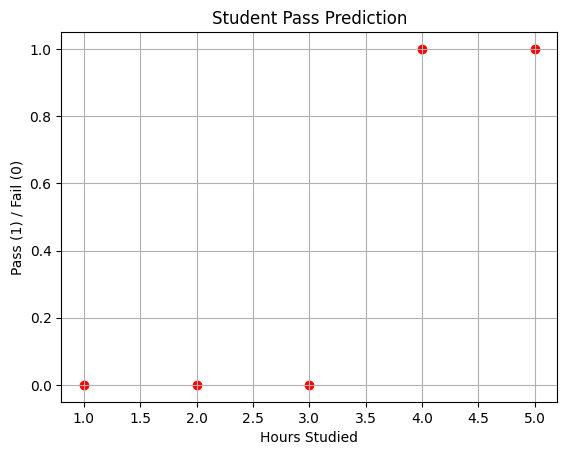

In [6]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [0, 0, 0, 1, 1]

plt.scatter(X,Y, color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Pass (1) / Fail (0)")
plt.title("Student Pass Prediction")
plt.grid(True)
plt.show()

*You’ll see all 0’s for small hours and 1’s for higher hours.*</br>
*So  it’s a Yes/No problem → not a straight line.*

You’ll see an **S-shaped curve**:

- Left side (negative z) → near **0 → Fail**
- Right side (positive z) → near **1 → Pass**

That’s why logistic regression uses **sigmoid** —  
it perfectly maps study hours (x) to **probability of passing**.

# Step 4 - How Do We Learn the Best Line?

We need to find the best **weights (w)** and **bias (b)**  
so that the **sigmoid curve fits the data** perfectly.

But how do we know if our prediction is **good or bad**?  
👉 We measure it using something called a **Loss Function**.

# Step 5 - Why We Need “Loss”

**Loss = “How wrong am I?”**

Example:

| True Label | Predicted | Result |
|-------------|------------|---------|
| 1 | 0.9 | ✅ Small Loss |
| 1 | 0.1 | ❌ Large Loss |

Mathematically:

\[
L = -[y \log(\hat{y}) + (1-y)\log(1-\hat{y})]
\]

This is called **Cross-Entropy Loss** or **Log Loss**.


In [7]:
import numpy as np

def loss(y_true, y_pred):
    return - (y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

print("When true=1, pred=0.9 →", loss(1, 0.9))
print("When true=1, pred=0.1 →", loss(1, 0.1))


When true=1, pred=0.9 → 0.10536051565782628
When true=1, pred=0.1 → 2.3025850929940455


You’ll see that the second case gives a **much higher number**.

👉 That means our goal is to make **loss as small as possible.**  
Smaller loss = better predictions.


# ⚙️ Step 6 - How Do We Reduce the Loss?

We use something called **Gradient Descent**.

### 🧩 Think Like This:

Imagine you’re standing on a **hill** (the loss surface).  
You want to go down to the **lowest point** (minimum loss).  
You take small steps **in the direction where the loss decreases fastest**.

That’s exactly what gradient descent does!

---

### 🧮 Math (don’t worry, it’s simple):

We change our weights step by step:

\[
w = w - \alpha \frac{\partial L}{\partial w}
\]

\[
b = b - \alpha \frac{\partial L}{\partial b}
\]

Where:

- \( \alpha \) = learning rate (how big each step is)
- \( \frac{\partial L}{\partial w} \) = slope of loss curve with respect to w


In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

# Define the sigmoid function
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

# Define the Loss entropy function
def loss(y_true,y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return - np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

# Initialize weights
w, b = 0.0, 0.0
lr = 0.1

# Training Loop
for i in range(1000):
    z = w*x + b
    y_pred = sigmoid(z)
    dw = np.mean((y_pred - y)*x)
    db = np.mean(y_pred - y)
    w -= lr * dw
    b -= lr * db

print("Learned weight:", w)
print("Learned bias:", b)


Learned weight: 1.769045864973106
Learned bias: -5.956350539118638


#  Step 7 - Visualize the Fitted Sigmoid


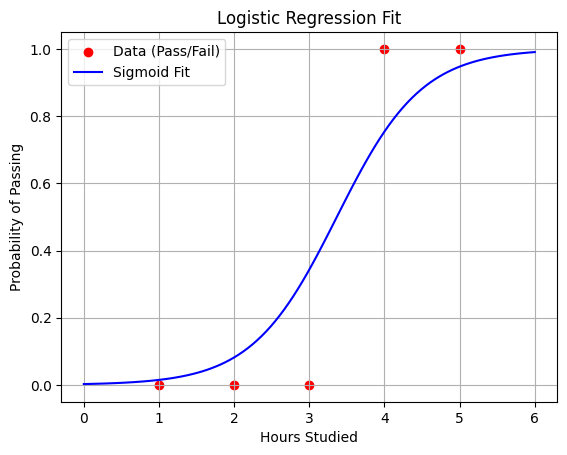

In [12]:
x_range = np.linspace(0, 6, 100)
y_pred = sigmoid(w*x_range + b)

plt.scatter(x, y, color='red', label='Data (Pass/Fail)')
plt.plot(x_range, y_pred, color='blue', label='Sigmoid Fit')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


# Step 8 - In Basic Words 

| Concept | Simple Meaning |
|----------|----------------|
| **Sigmoid** | Converts line output into probability (0–1) |
| **Loss** | Tells how wrong we are |
| **Gradient Descent** | A way to adjust guesses to be less wrong |
| **Goal** | Make sigmoid fit data → predict “Yes” or “No” correctly |

---

### 💬 Final Example

👩‍🏫 You are a teacher.  
Each student studies for some hours.  
You guess how many hours = pass or fail.  
Every time you’re wrong, you **adjust your rule a bit**.  
After many tries, you get a rule that predicts **passing chances correctly**.

That’s **Logistic Regression** 💡
